In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Download the repo

In [2]:
!git clone https://github.com/theschoolofai/YoloV3.git

Cloning into 'YoloV3'...
remote: Enumerating objects: 156, done.
remote: Total 156 (delta 0), reused 0 (delta 0), pack-reused 156
Receiving objects: 100% (156/156), 12.74 MiB | 28.43 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [3]:
!cp /content/drive/MyDrive/EVA/customdata.zip customdata.zip

In [4]:
!unzip customdata.zip

Streaming output truncated to the last 5000 lines.
  inflating: customdata/images/Jimg075.jpg  
  inflating: customdata/images/Jimg076.jpg  
  inflating: customdata/images/Jimg077.jpg  
  inflating: customdata/images/Jimg078.jpg  
  inflating: customdata/images/Jimg079.jpg  
  inflating: customdata/images/Jimg080.jpg  
  inflating: customdata/images/Jimg081.jpg  
  inflating: customdata/images/Jimg082.jpg  
  inflating: customdata/images/Jimg083.jpg  
  inflating: customdata/images/Jimg084.jpg  
  inflating: customdata/images/Jimg085.jpg  
  inflating: customdata/images/Jimg086.jpg  
  inflating: customdata/images/Jimg087.jpg  
  inflating: customdata/images/Jimg088.jpg  
  inflating: customdata/images/Jimg089.jpg  
  inflating: customdata/images/Jimg090.jpg  
  inflating: customdata/images/Jimg091.jpg  
  inflating: customdata/images/Jimg092.jpg  
  inflating: customdata/images/Jimg093.jpg  
  inflating: customdata/images/Jimg094.jpg  
  inflating: customdata/images/Jimg095.jpg  
  in

## Config file for custom dataset

In [5]:
!cat /content/customdata/custom.data

classes=4
train=data/customdata/train.txt
valid=data/customdata/test.txt
names=data/customdata/custom.names

In [6]:
!cat /content/customdata/custom.names

hardhat
vest
mask
boots

In [7]:
!cat /content/customdata/custom.shapes

640 480
640 426
640 428
640 425
481 640
381 500
640 488
480 640
640 426
427 640
500 375
612 612
640 425
512 640
640 480
640 427
640 427
640 416
640 480
416 640


In [8]:
## Now lets look into YOLO custom.data
!cat /content/YoloV3/data/customdata/custom.data

classes=1
train=data/customdata/custom.txt
valid=data/customdata/custom.txt
names=data/customdata/custom.names


In [9]:
## Now lets look into YOLO custom.name
!cat /content/YoloV3/data/customdata/custom.names

walle

In [10]:
## so we should overwrite our custom data

!mv  /content/YoloV3/data/customdata/custom.data /content/YoloV3/data/customdata/custom.data.backup
!mv /content/YoloV3/data/customdata/custom.names /content/YoloV3/data/customdata/custom.names.backup
!mv /content/YoloV3/data/customdata/custom.txt /content/YoloV3/data/customdata/custom.txt.backup
!mv /content/YoloV3/data/customdata/custom.shapes /content/YoloV3/data/customdata/custom.shapes.backup

In [11]:
!cp /content/customdata/custom.data /content/YoloV3/data/customdata/custom.data
!cp /content/customdata/custom.names /content/YoloV3/data/customdata/custom.names
!cp /content/customdata/custom.shapes /content/YoloV3/data/customdata/custom.shapes
!cp /content/customdata/train.txt  /content/YoloV3/data/customdata/train.txt
!cp /content/customdata/test.txt  /content/YoloV3/data/customdata/test.txt

In [12]:
!cat /content/YoloV3/data/customdata/custom.names

hardhat
vest
mask
boots

## Import libraries

In [13]:
import torch

In [14]:
import time
import glob
import torch
import os
import warnings
warnings.filterwarnings('ignore')

from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.10.0+cu111 _CudaDeviceProperties(name='Tesla K80', major=3, minor=7, total_memory=11441MB, multi_processor_count=13)


In [15]:
torch.cuda.is_available()

True

In [16]:
%cd /content/YoloV3/

/content/YoloV3


In [17]:
!mkdir weights
!wget https://drive.google.com/file/d/1UcR-zVoMs7DH5dj3N1bswkiQTA4dmKF4/view?usp=sharing > yolov3-spp-ultralytics.pt
!mv  yolov3-spp-ultralytics.pt /content/YoloV3/yolov3-spp-ultralytics.pt

--2021-12-24 15:22:33--  https://drive.google.com/file/d/1UcR-zVoMs7DH5dj3N1bswkiQTA4dmKF4/view?usp=sharing
Resolving drive.google.com (drive.google.com)... 142.250.136.139, 142.250.136.113, 142.250.136.100, ...
Connecting to drive.google.com (drive.google.com)|142.250.136.139|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘view?usp=sharing’

view?usp=sharing        [ <=>                ]  64.97K  --.-KB/s    in 0.001s  

2021-12-24 15:22:34 (45.7 MB/s) - ‘view?usp=sharing’ saved [66528]

mv: 'yolov3-spp-ultralytics.pt' and '/content/YoloV3/yolov3-spp-ultralytics.pt' are the same file


## Test the pipeline by training on small coco dataset

In [ ]:
!python train.py --data data/smalcoco/smalcoco.data --batch 10 --cache --epochs 3 --nosave

Namespace(accumulate=4, adam=False, batch_size=10, bucket='', cache_images=True, cfg='cfg/yolov3-spp.cfg', data='data/smalcoco/smalcoco.data', device='', epochs=3, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla K80', total_memory=11441MB)

Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   408    0   408    0     0   1130      0 --:--:-- --:--:-- --:--:--  1130
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100  240M  100  240M    0     0  4

In [19]:
from datetime import date

## Train for 300 epochs using custom dataset

In [18]:
!mv /content/YoloV3/data/customdata/images /content/YoloV3/data/customdata/images_backup
!mv /content/YoloV3/data/customdata/labels /content/YoloV3/data/customdata/labels_backup

In [20]:
!cp -r /content/customdata/images /content/YoloV3/data/customdata/images
!cp -r /content/customdata/labels /content/YoloV3/data/customdata/labels
today = date.today()
print("Today's date:", today)

Today's date: 2021-12-24


In [21]:
!cp /content/YoloV3/cfg/yolov3-custom.cfg /content/YoloV3/cfg/yolov3-custom.cfg_backup
today = date.today()
print("Today's date:", today)

Today's date: 2021-12-24


In [22]:
!cp /content/drive/MyDrive/EVA/yolov3-custom.cfg /content/YoloV3/cfg/yolov3-custom.cfg
today = date.today()
print("Today's date:", today)

Today's date: 2021-12-24


In [25]:
today = date.today()
print("Today's Training start date-time:", today)
!python train.py --data data/customdata/custom.data --batch 10 --cache --cfg cfg/yolov3-custom.cfg --epochs 100

today = date.today()
print("Today's Training End date-time:", today)

## Read more from https://github.com/ultralytics/yolov3/wiki/Train-Custom-Data

Today's Training start date-time: 2021-12-24
Namespace(accumulate=4, adam=False, batch_size=10, bucket='', cache_images=True, cfg='cfg/yolov3-custom.cfg', data='data/customdata/custom.data', device='', epochs=300, evolve=False, img_size=[512], multi_scale=False, name='', nosave=False, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla K80', total_memory=11441MB)

Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   408    0   408    0     0   2158      0 --:--:-- --:--:-- --:--:--  2158
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-

## Predict on images to detect classes

In [ ]:
# !wget https://github.com/amitkml/Transformer-DeepLearning/blob/main/Session-11-Yolo-ObjDetection/YoloV3-CustomDataSet/KnownClass/images.zip > images.zip

--2021-12-19 12:33:36--  https://github.com/amitkml/Transformer-DeepLearning/blob/main/Session-11-Yolo-ObjDetection/YoloV3-CustomDataSet/KnownClass/images.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘images.zip.2’

images.zip.2            [ <=>                ] 163.42K  --.-KB/s    in 0.08s   

2021-12-19 12:33:37 (2.10 MB/s) - ‘images.zip.2’ saved [167341]



In [26]:
!mkdir custom_images

In [ ]:
# !mv images.zip.2 /content/YoloV3/custom_test_images/images.zip

In [27]:
%cd /content/YoloV3/custom_images

/content/YoloV3/custom_images


In [28]:
# !ls -ltr  /content/YoloV3/custom_images/images.zip

In [29]:
# !unzip /content/YoloV3/custom_images/images.zip -d /content/YoloV3/custom_images/images

In [30]:
!cp /content/drive/MyDrive/EVA/Test-Images.zip Test-Images.zip

In [31]:
!unzip Test-Images.zip

Archive:  Test-Images.zip
  inflating: Test-Images/1.jpg       
  inflating: Test-Images/12_m_boots_520x650.jpg  
  inflating: Test-Images/7547d3c7b4b526b96dad0d89e.jpeg  
  inflating: Test-Images/adad.jpg    
  inflating: Test-Images/ash_heidi_wilde_brushed.jpg  
  inflating: Test-Images/assorted16610mss21blk_1.jpg  
  inflating: Test-Images/boots.jpg   
  inflating: Test-Images/bootsxxx.jpg  
  inflating: Test-Images/BR00283-300x300.jpg  
  inflating: Test-Images/D0C028FF47A678B4F19D1AA71B_1593084628016.jpg  
  inflating: Test-Images/face%20masks%20on%20amazon.jpg  
  inflating: Test-Images/image-01.jpg  
  inflating: Test-Images/image-02.jpg  
  inflating: Test-Images/image-03.jpg  
  inflating: Test-Images/image-04.jpg  
  inflating: Test-Images/image-05.jpg  
  inflating: Test-Images/image-06.jpg  
  inflating: Test-Images/image-07.jpg  
  inflating: Test-Images/image-08.jpg  
  inflating: Test-Images/image-09.jpg  
  inflating: Test-Images/image-10.jpg  
  inflating: Test-Images/

In [32]:
%cd /content/YoloV3

/content/YoloV3


In [33]:
!python detect.py --conf-thres 0.3 --source "/content/YoloV3/custom_images/Test-Images" --output /content/drive/MyDrive/EVA/output

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.3, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='/content/drive/MyDrive/EVA/output', save_txt=False, source='/content/YoloV3/custom_images/Test-Images', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla K80', total_memory=11441MB)

Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
image 1/24 /content/YoloV3/custom_images/Test-Images/1.jpg: 512x448 Done. (0.119s)
image 2/24 /content/YoloV3/custom_images/Test-Images/12_m_boots_520x650.jpg: 512x448 D

## Prediction on video file

In [54]:
!python detect.py --conf-thres 0.3 --source "/content/drive/MyDrive/EVA/helmets_work.mp4" --output /content/drive/MyDrive/EVA/video/

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.3, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='/content/drive/MyDrive/EVA/video/helmets_work_yolo.mp4', save_txt=False, source='/content/drive/MyDrive/EVA/helmets_work.mp4', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla K80', total_memory=11441MB)

Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
video 1/1 (1/1826) /content/drive/MyDrive/EVA/helmets_work.mp4: 320x512 Done. (0.084s)
video 1/1 (2/1826) /content/drive/MyDrive/EVA/helmets_work.

## Predictions for Hardhat, Masks, Vest and Boots

In [36]:
w=500

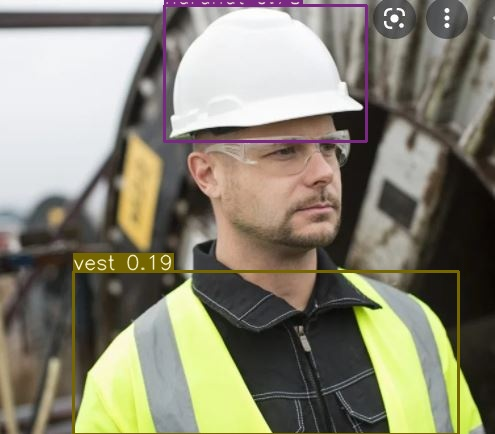

In [37]:
Image(filename='/content/drive/MyDrive/EVA/output/image-01.jpg', width=w)

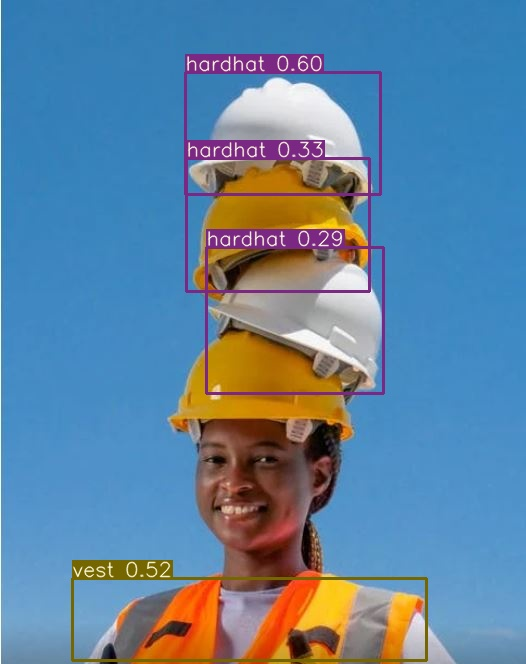

In [38]:
Image(filename='/content/drive/MyDrive/EVA/output/image-02.jpg', width=w)

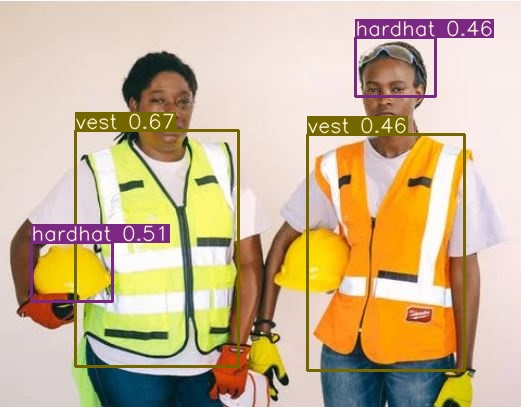

In [39]:
Image(filename='/content/drive/MyDrive/EVA/output/image-03.jpg', width=w)

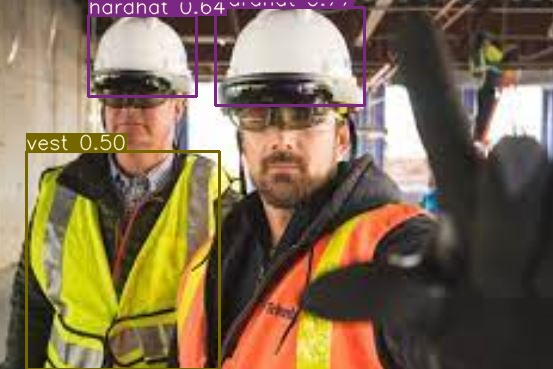

In [40]:
Image(filename='/content/drive/MyDrive/EVA/output/image-04.jpg', width=w)

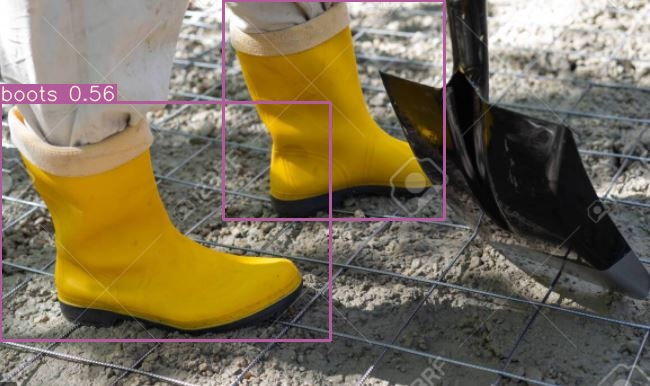

In [41]:
Image(filename='/content/drive/MyDrive/EVA/output/image-05.jpg', width=w)

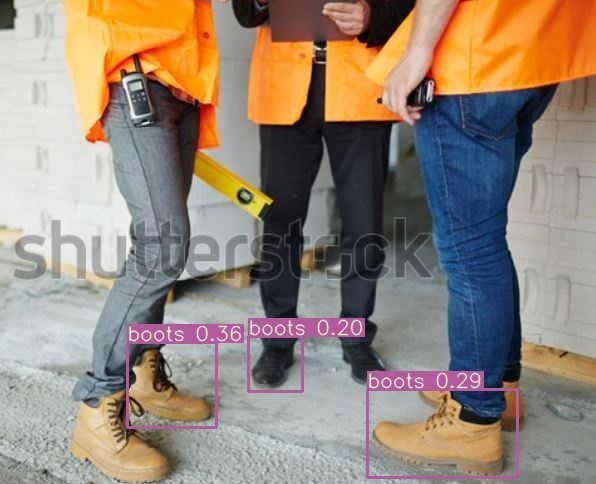

In [42]:
Image(filename='/content/drive/MyDrive/EVA/output/image-06.jpg', width=w)

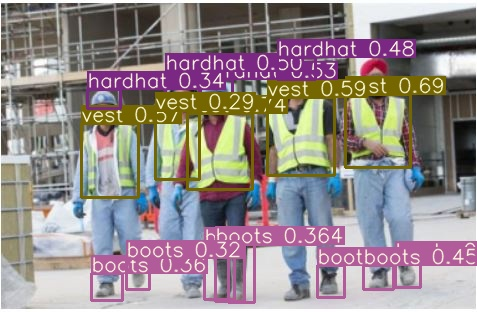

In [43]:
Image(filename='/content/drive/MyDrive/EVA/output/image-08.jpg', width=w)

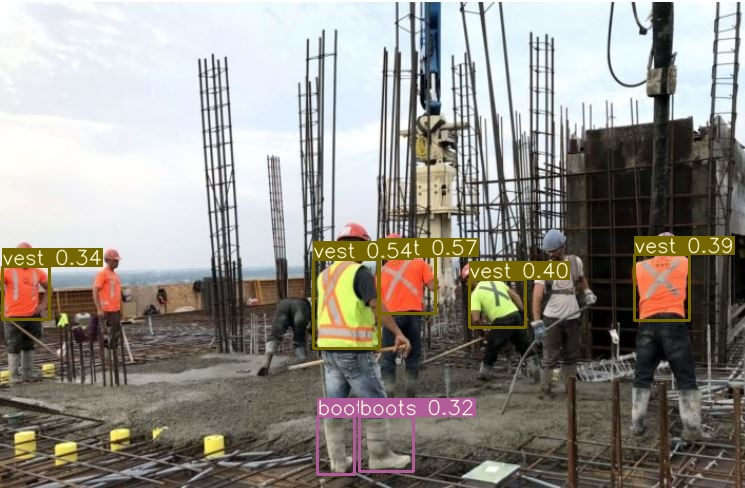

In [44]:
Image(filename='/content/drive/MyDrive/EVA/output/image-09.jpg', width=w)

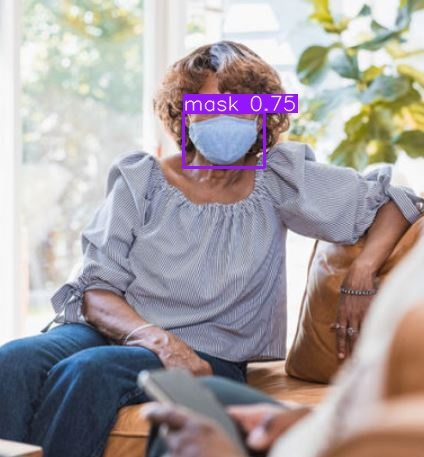

In [45]:
Image(filename='/content/drive/MyDrive/EVA/output/image-10.jpg', width=w)

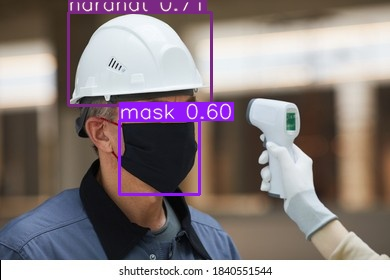

In [46]:
Image(filename='/content/drive/MyDrive/EVA/output/image-11.jpg', width=w)

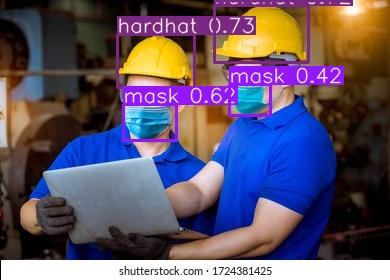

In [47]:
Image(filename='/content/drive/MyDrive/EVA/output/image-12.jpg', width=w)

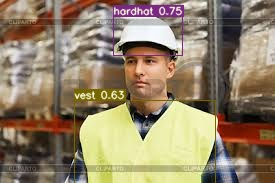

In [48]:
Image(filename='/content/drive/MyDrive/EVA/output/image-13.jpg', width=w)